In [15]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memuat dataset
print("Memuat dan memproses dataset...")
data = pd.read_csv('/german_credit_data.csv')

# Melihat struktur data
print("\nInformasi dataset:")
print(f"Jumlah sampel: {data.shape[0]}, Jumlah fitur: {data.shape[1]}")
print("\nLima baris pertama data:")
print(data.head())

# Mengecek nilai yang hilang
print("\nMengecek nilai yang hilang:")
print(data.isnull().sum())

Memuat dan memproses dataset...

Informasi dataset:
Jumlah sampel: 1000, Jumlah fitur: 10

Lima baris pertama data:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

Mengecek nilai yang hilang:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Ho

In [16]:
# Mengisi nilai yang hilang dengan modus
data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode()[0])
data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode()[0])

# Menyiapkan target (Risk)
# Pastikan kolom Risk ada, jika tidak ada kita buat simulasi
if 'Risk' not in data.columns:
    print("\nKolom 'Risk' tidak ditemukan. Membuat simulasi label risk...")
    # Membuat aturan sederhana berdasarkan Credit amount dan Duration
    # Ini hanya contoh simulasi, silakan sesuaikan dengan kebutuhan
    threshold_amount = data['Credit amount'].median()
    threshold_duration = data['Duration'].median()

    # Jika Credit amount tinggi dan Duration panjang, risiko tinggi (bad=0)
    # Sebaliknya, risiko rendah (good=1)
    data['Risk'] = np.where(
        (data['Credit amount'] > threshold_amount) & (data['Duration'] > threshold_duration),
        'bad', 'good')

    print("Label Risk telah dibuat dengan simulasi.")
else:
    print("\nMenggunakan kolom Risk yang tersedia di dataset.")

# Mengkonversi Risk ke numerik
data['Risk'] = data['Risk'].map({'good': 1, 'bad': 0})

# Melihat distribusi kelas target
print("\nDistribusi kelas Risk:")
print(data['Risk'].value_counts())
print(f"Proporsi kelas: {data['Risk'].value_counts(normalize=True)}")

# Memproses fitur kategorik
print("\nMengkodekan variabel kategorik...")
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(f"Jumlah fitur setelah one-hot encoding: {data_encoded.shape[1]}")

# Memisahkan fitur dan target
X = data_encoded.drop(['Risk'], axis=1)
y = data_encoded['Risk']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData telah dinormalisasi.")
print(f"Jumlah sampel pelatihan: {X_train.shape[0]}")
print(f"Jumlah sampel pengujian: {X_test.shape[0]}")


Kolom 'Risk' tidak ditemukan. Membuat simulasi label risk...
Label Risk telah dibuat dengan simulasi.

Distribusi kelas Risk:
Risk
1    650
0    350
Name: count, dtype: int64
Proporsi kelas: Risk
1    0.65
0    0.35
Name: proportion, dtype: float64

Mengkodekan variabel kategorik...
Jumlah fitur setelah one-hot encoding: 21

Data telah dinormalisasi.
Jumlah sampel pelatihan: 800
Jumlah sampel pengujian: 200


In [17]:
print("\n" + "="*50)
print("Pelatihan dan pengujian SVM dengan berbagai kernel")
print("="*50)

# Daftar kernel
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = []

# Pelatihan dan pengujian untuk setiap kernel
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    start_time = time.time()

    # Inisialisasi model SVM
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)

    # Pelatihan model
    print("Melatih model...")
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Menghitung waktu eksekusi
    exec_time = time.time() - start_time

    # Menyimpan hasil
    results.append({'Kernel': kernel, 'Akurasi': accuracy, 'Waktu Eksekusi (detik)': exec_time})

    print(f"Akurasi: {accuracy:.4f}")
    print(f"Waktu Eksekusi: {exec_time:.4f} detik")

    # Confusion matrix dan classification report
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Membuat tabel hasil
results_df = pd.DataFrame(results)
print("\nTabel Hasil Uji Coba:")
print(results_df)


Pelatihan dan pengujian SVM dengan berbagai kernel

Kernel: linear
Melatih model...
Akurasi: 0.9000
Waktu Eksekusi: 0.1506 detik

Confusion Matrix:
[[ 51  13]
 [  7 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        64
           1       0.91      0.95      0.93       136

    accuracy                           0.90       200
   macro avg       0.89      0.87      0.88       200
weighted avg       0.90      0.90      0.90       200


Kernel: rbf
Melatih model...
Akurasi: 0.8700
Waktu Eksekusi: 0.1906 detik

Confusion Matrix:
[[ 44  20]
 [  6 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        64
           1       0.87      0.96      0.91       136

    accuracy                           0.87       200
   macro avg       0.87      0.82      0.84       200
weighted avg       0.87      0.87      0.87       200


Kernel: 


Grafik perbandingan telah disimpan sebagai 'svm_kernel_comparison.png'


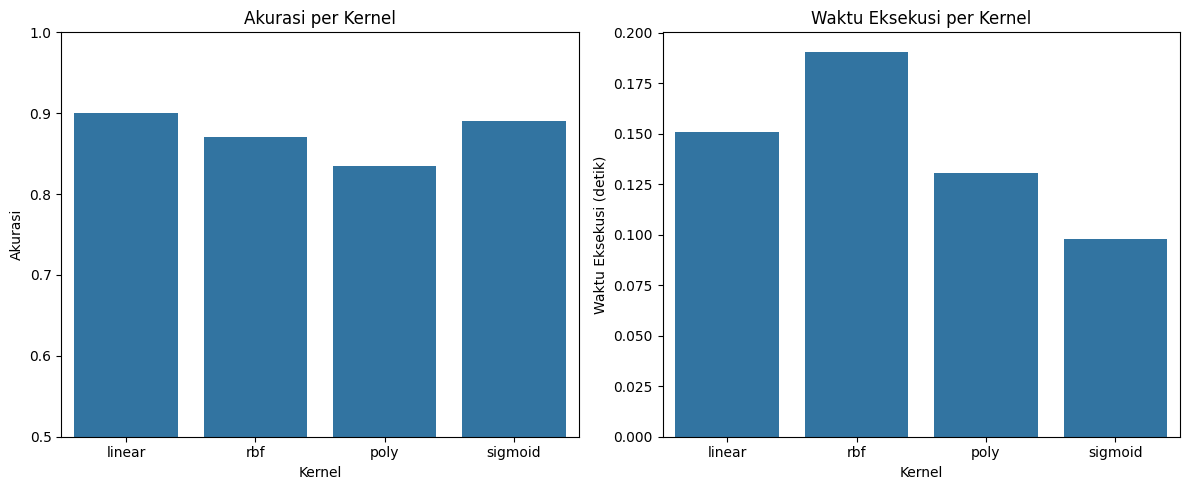

In [18]:
# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
sns.barplot(x='Kernel', y='Akurasi', data=results_df)
plt.title('Akurasi per Kernel')
plt.ylim(0.5, 1.0)  # Mulai dari 0.5 untuk melihat perbedaan yang lebih jelas

# Plot waktu eksekusi
plt.subplot(1, 2, 2)
sns.barplot(x='Kernel', y='Waktu Eksekusi (detik)', data=results_df)
plt.title('Waktu Eksekusi per Kernel')

plt.tight_layout()
plt.savefig('svm_kernel_comparison.png')
print("\nGrafik perbandingan telah disimpan sebagai 'svm_kernel_comparison.png'")

In [19]:
print("\n" + "="*50)
print("Penyetelan Hiperparameter untuk Kernel RBF")
print("="*50)

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

# Inisialisasi model dan GridSearch
print("\nMemulai pencarian parameter optimal...")
model = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
grid_time = time.time() - start_time

# Hasil terbaik
print(f"\nParameter terbaik: {grid_search.best_params_}")
print(f"Akurasi validasi silang terbaik: {grid_search.best_score_:.4f}")
print(f"Waktu pencarian: {grid_time:.2f} detik")

# Menguji model optimal pada data uji
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\nAkurasi model optimal pada data uji: {best_accuracy:.4f}")
print("\nClassification Report untuk model optimal:")
print(classification_report(y_test, y_pred_best))


Penyetelan Hiperparameter untuk Kernel RBF

Memulai pencarian parameter optimal...

Parameter terbaik: {'C': 10, 'gamma': 0.01}
Akurasi validasi silang terbaik: 0.9175
Waktu pencarian: 1.85 detik

Akurasi model optimal pada data uji: 0.8950

Classification Report untuk model optimal:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        64
           1       0.90      0.95      0.92       136

    accuracy                           0.90       200
   macro avg       0.89      0.86      0.88       200
weighted avg       0.89      0.90      0.89       200



In [20]:
print("\n" + "="*50)
print("Kesimpulan")
print("="*50)

best_kernel = results_df.loc[results_df['Akurasi'].idxmax()]['Kernel']
worst_kernel = results_df.loc[results_df['Akurasi'].idxmin()]['Kernel']
fastest_kernel = results_df.loc[results_df['Waktu Eksekusi (detik)'].idxmin()]['Kernel']

print(f"Kernel dengan akurasi tertinggi: {best_kernel} ({results_df['Akurasi'].max():.4f})")
print(f"Kernel dengan akurasi terendah: {worst_kernel} ({results_df['Akurasi'].min():.4f})")
print(f"Kernel tercepat: {fastest_kernel} ({results_df['Waktu Eksekusi (detik)'].min():.4f} detik)")

if best_accuracy > results_df['Akurasi'].max():
    print(f"\nSetelah penyetelan parameter, akurasi meningkat dari {results_df['Akurasi'].max():.4f} menjadi {best_accuracy:.4f}")
    print(f"Parameter optimal: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
else:
    print("\nPenyetelan parameter tidak meningkatkan akurasi secara signifikan.")

print("\nRekomendasi:")
if best_accuracy > results_df['Akurasi'].max():
    print(f"Gunakan kernel RBF dengan C={grid_search.best_params_['C']} dan gamma={grid_search.best_params_['gamma']} untuk klasifikasi risiko kredit ini.")
else:
    print(f"Gunakan kernel {best_kernel} untuk klasifikasi risiko kredit ini.")


Kesimpulan
Kernel dengan akurasi tertinggi: linear (0.9000)
Kernel dengan akurasi terendah: poly (0.8350)
Kernel tercepat: sigmoid (0.0978 detik)

Penyetelan parameter tidak meningkatkan akurasi secara signifikan.

Rekomendasi:
Gunakan kernel linear untuk klasifikasi risiko kredit ini.
